In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
#import data
dataset = pd.read_csv('IBM.csv')

In [132]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/30/2012,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,5/1/2012,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,5/2/2012,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,5/3/2012,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,5/4/2012,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [134]:
print(1509*.7)

1056.3


In [135]:
#set up a training set- not random since sequence will matter
data_train = pd.DataFrame(dataset[0:1056])
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/30/2012,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,5/1/2012,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,5/2/2012,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,5/3/2012,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,5/4/2012,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


In [136]:
#set up a testing set
data_test = pd.DataFrame(dataset[1056:1510])
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1056,7/12/2016,156.000000,157.119995,155.520004,157.039993,147.086227,3843800
1057,7/13/2016,157.750000,158.339996,157.059998,158.020004,148.004135,2746400
1058,7/14/2016,158.809998,161.399994,158.580002,160.279999,150.120880,4637600
1059,7/15/2016,159.899994,159.979996,158.500000,159.779999,149.652557,4476800
1060,7/18/2016,159.300003,160.750000,158.729996,159.860001,149.727524,6729700


In [137]:
training_set = data_train.iloc[:, 1:2].values

In [138]:
testing_set = data_test.iloc[:, 1:2].values

In [139]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.transform(testing_set)

In [140]:
testing_set_scaled.shape

(453, 1)

In [141]:
training_set_scaled.shape

(1056, 1)

In [152]:
#creating a data sctructure with 60 timesteps
#three dimensions (features, observations, timesteps)
X_train = []
y_train = []
for i in range(60,1056):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [153]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#creating a data sctructure with 60 timesteps
#three dimensions (features, observations, timesteps)
X_test = []
y_test = []
for i in range(60,453):
    X_test.append(testing_set_scaled[i-60:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [155]:
regressor = Sequential()

In [156]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [157]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [158]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [159]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [160]:
regressor.add(Dense(units=1))

In [161]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [162]:
regressor.fit(X_train, y_train, epochs=35, batch_size=35)

Epoch 1/35
996/996 [==============================] - 10s 10ms/step - loss: 0.0740
Epoch 2/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0130
Epoch 3/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0082
Epoch 4/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0086
Epoch 5/35
996/996 [==============================] - 7s 8ms/step - loss: 0.0085
Epoch 6/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0076
Epoch 7/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0075
Epoch 8/35
996/996 [==============================] - 7s 7ms/step - loss: 0.0069
Epoch 9/35
996/996 [==============================] - 7s 8ms/step - loss: 0.0066
Epoch 10/35
996/996 [==============================] - 7s 8ms/step - loss: 0.0063
Epoch 11/35
996/996 [==============================] - 8s 8ms/step - loss: 0.0065
Epoch 12/35
996/996 [==============================] - 8s 8ms/step - loss: 0.0066
Epoch 13/35
996/996 [==

In [163]:
real_stock_price_train = data_train.iloc[:, 1:2].values
real_stock_price_test = data_test.iloc[:, 1:2].values

In [177]:
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,513):
    X_test.append(inputs[i-60:i,0])

In [178]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

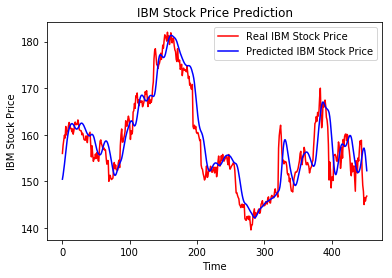

In [179]:
## Training set

plt.plot(real_stock_price_test, color='red', label='Real IBM Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()